In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


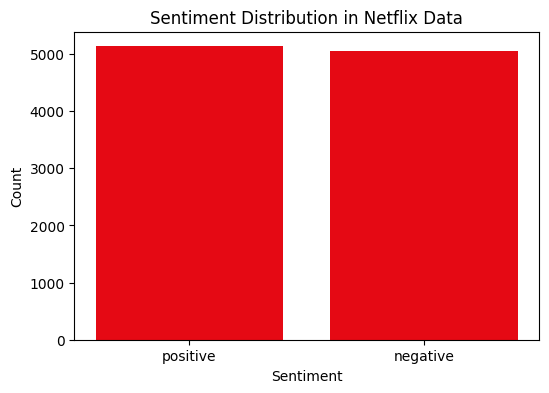

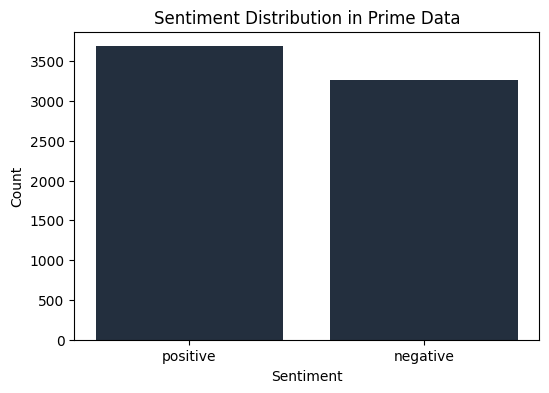

In [13]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

# The datasets
netflix_data = pd.read_csv('/content/drive/MyDrive/CSS_final/netdatanew (1).csv')
prime_data = pd.read_excel('/content/drive/MyDrive/CSS_final/amazondatanew (1).xlsx')

nltk.download('vader_lexicon')

# We select column "Summary" for analysis
netflix_data = netflix_data[['Summary']].copy()
prime_data = prime_data[['Summary']].copy()

# Remove any rows with missing values
netflix_data.dropna(inplace=True)
prime_data.dropna(inplace=True)

# Convert summaries to lowercase
netflix_data.loc[:, 'Summary'] = netflix_data['Summary'].str.lower()
prime_data.loc[:, 'Summary'] = prime_data['Summary'].str.lower()


sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on Netflix data
netflix_data['sentiment_scores'] = netflix_data['Summary'].apply(lambda x: sia.polarity_scores(x))
netflix_data['compound_score'] = netflix_data['sentiment_scores'].apply(lambda x: x['compound'])
netflix_data['sentiment'] = netflix_data['compound_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')

# Perform sentiment analysis on Prime data
prime_data['sentiment_scores'] = prime_data['Summary'].apply(lambda x: sia.polarity_scores(str(x)) if pd.notnull(x) else np.nan)
prime_data['compound_score'] = prime_data['sentiment_scores'].apply(lambda x: x['compound'] if pd.notnull(x) else np.nan)
prime_data['sentiment'] = prime_data['compound_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')

# Define colors for Netflix and Prime
netflix_color = '#E50914'  # Netflix red color
prime_color = '#232F3E'  # Amazon Prime blue color

# Create bar plots for sentiment distribution in Netflix data
netflix_sentiment_counts = netflix_data['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(netflix_sentiment_counts.index, netflix_sentiment_counts.values, color=netflix_color)
plt.title('Sentiment Distribution in Netflix Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Create bar plots for sentiment distribution in Prime data
prime_sentiment_counts = prime_data['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(prime_sentiment_counts.index, prime_sentiment_counts.values, color=prime_color)
plt.title('Sentiment Distribution in Prime Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
